In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

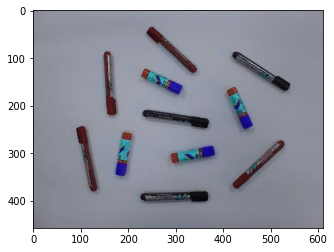

In [2]:
original = cv.imread('objects3.jpg')
plt.imshow(original)

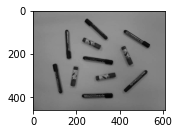

In [3]:
gray_im = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
plt.subplot(222)
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

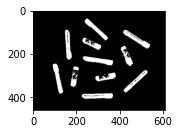

In [4]:
thresh = cv.adaptiveThreshold(gray_correct, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 255, 19)
thresh = cv.bitwise_not(thresh)
plt.subplot(221)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)

In [5]:

kernel = np.ones((15,15), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)
img_erode = cv.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv.medianBlur(img_erode, 7)


objects number is: 11


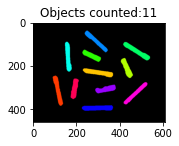

In [6]:
# Labeling

ret, labels = cv.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()